Inflation is the rate at which the general level of prices for goods and services rises over time, which leads to a decrease in the purchasing power of money. It indicates how much more expensive a set of goods and services has become over a certain period.

Inflation Impact Analysis: Overview

Inflation occurs when there is a sustained increase in the general price level of goods and services in an economy over time. It impacts various aspects of the economy, including purchasing power, consumer behaviour, savings, and investment. Moderate inflation is typically a sign of a healthy, growing economy, as it encourages spending and investment. However, high or unpredictable inflation can erode the value of money, disrupt financial planning, and lead to economic uncertainty.

To analyze the impact of inflation, we need to compare it with other economic indicators. So, to analyze the impact of inflation on the economy, we will compare it with the exchange rates over time. This comparison is important because exchange rates are influenced by inflation differentials between countries, such that higher inflation in a country generally leads to a weaker currency relative to countries with lower inflation.

In [2]:
import pandas as pd
df=pd.read_csv('global_inflation_data.csv')
df_IND_US=df[df['country_name'].isin(['India','United States'])]
df_IND_US.reset_index(drop=True,inplace=True)

df_IND_US=df_IND_US.iloc[:,2:47]
df_IND_US.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11.3,12.7,7.7,12.6,6.5,6.3,8.9,9.1,7.2,4.6,...,4.9,4.5,3.6,3.4,4.8,6.2,5.5,6.7,5.5,4.6
1,13.5,10.4,6.2,3.2,4.4,3.5,1.9,3.6,4.1,4.8,...,0.1,1.3,2.1,2.4,1.8,1.3,4.7,8.0,4.1,2.8


In [4]:
df_transpose=df_IND_US.transpose().reset_index()
df_transpose.head()
df_transpose.columns=['Year','India','United States']
inflation=df_transpose
inflation['Year']=pd.to_numeric(inflation['Year'])
print(inflation.head())
inflation.info()

   Year  India  United States
0  1980   11.3           13.5
1  1981   12.7           10.4
2  1982    7.7            6.2
3  1983   12.6            3.2
4  1984    6.5            4.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           45 non-null     int64  
 1   India          45 non-null     float64
 2   United States  45 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [5]:
df_2=pd.read_csv('FAOSTAT_data_en_11-27-2024 (2).csv')
exchange_rate=df_2[['Year', 'Value']]
exchange_rate.head()


,Year,Value
0,1970,7.500000
1,1971,7.491935
2,1972,7.594468
3,1973,7.742039
4,1974,8.101603


In [6]:
#YEARS FROM 1980-2024
exchange_rate=exchange_rate[exchange_rate['Year']>=1980]
exchange_rate.reset_index(drop=True,inplace=True)
exchange_rate.head()

,Year,Value
0,1980,7.862945
1,1981,8.658523
2,1982,9.455132
3,1983,10.098898
4,1984,11.362583


In [7]:
#RENAME COLUMNS
exchange_rate.rename(columns={'Value':'Exchange_Rate'},inplace=True)
exchange_rate.head()

,Year,Exchange_Rate
0,1980,7.862945
1,1981,8.658523
2,1982,9.455132
3,1983,10.098898
4,1984,11.362583


In [11]:
#JOINING THE TWO DATA FRAMES
inf_ex=pd.merge(inflation,exchange_rate,on='Year')
inf_ex.head()

,Year,India,United States,Exchange_Rate
0,1980,11.3,13.5,7.862945
1,1980,11.3,13.5,7.862945
2,1981,12.7,10.4,8.658523
3,1981,12.7,10.4,8.658523
4,1982,7.7,6.2,9.455132


The merged dataset now contains the following columns for each year:

Exchange Rate (INR/USD): The average exchange rate of INR to USD. Inflation Rate (India): The inflation rate for India. Inflation Rate (United States): The inflation rate for the United States.

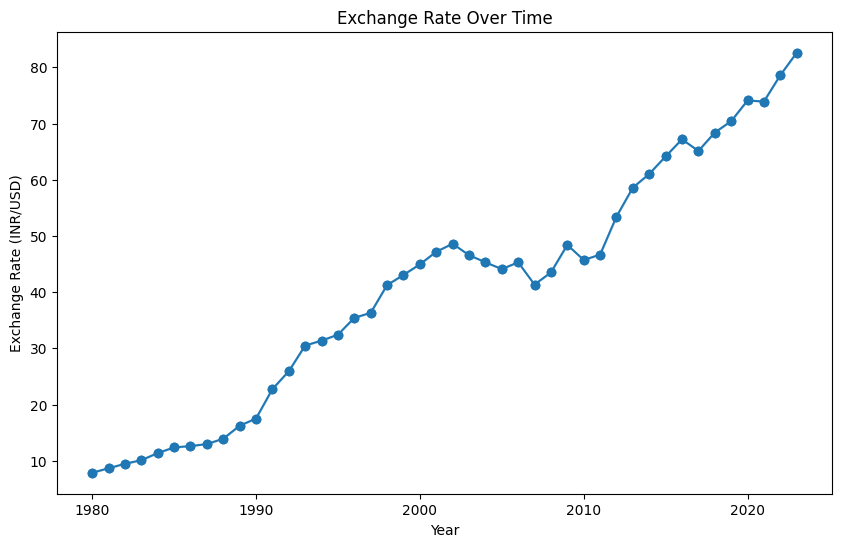

In [12]:
#Let’s start by analyzing the trend of inflation rates for both India and the United States alongside the exchange rate:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data=inf_ex,x='Year',y='Exchange_Rate')
plt.scatter(data=inf_ex,x='Year',y='Exchange_Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Exchange Rate (INR/USD)')
plt.show()

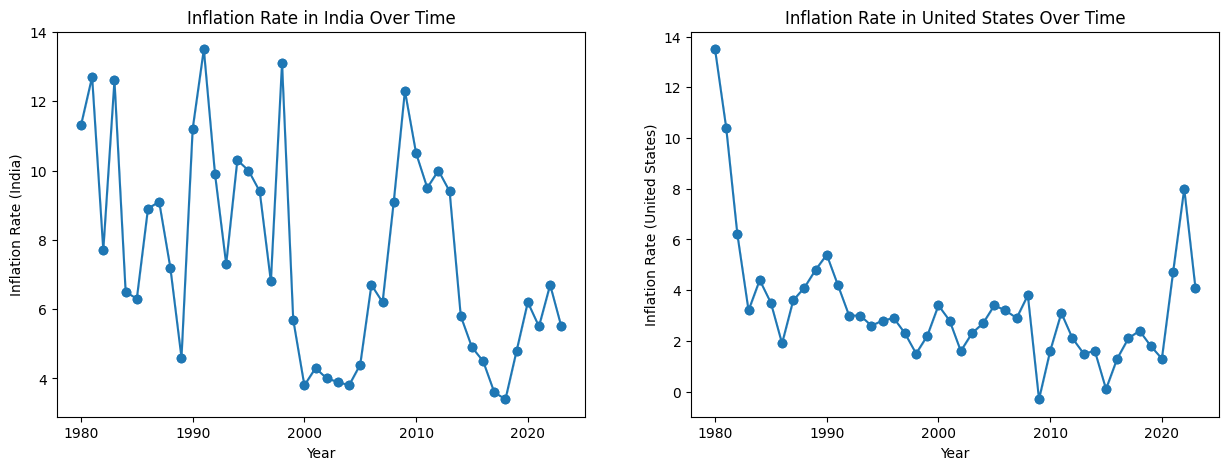

In [13]:
#INFLATION RATE
my_grid=plt.GridSpec(2,2)

my_fig=plt.figure(figsize=(15,5))

my_fig.add_subplot(my_grid[:,0])
sns.lineplot(data=inf_ex,x='Year',y='India')
plt.scatter(data=inf_ex,x='Year',y='India')
plt.title('Inflation Rate in India Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (India)')

my_fig.add_subplot(my_grid[:,1])
sns.lineplot(data=inf_ex,x='Year',y='United States')
plt.scatter(data=inf_ex,x='Year',y='United States')
plt.title('Inflation Rate in United States Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (United States)')

plt.show()

The exchange rate shows a general upward trend over the years, which indicates a depreciation of the Indian Rupee against the US Dollar. However, there are periods of both sharp increases and relative stability.

India’s inflation rate has fluctuated significantly over the years, with periods of high inflation (e.g., early 2000s) and more stable inflation in recent years. The United States has generally experienced lower and more stable inflation rates compared to India, with fewer extreme fluctuations.

Next, let’s perform a correlation analysis to explore the relationship between the inflation rates and the exchange rates:

In [14]:
correlation=inf_ex[['Exchange_Rate','India', 'United States']].corr()
correlation

,Exchange_Rate,India,United States
Exchange_Rate,1.000000,-0.486377,-0.413154
India,-0.486377,1.000000,0.249982
United States,-0.413154,0.249982,1.000000


EXCHANGE RATE VS INDIA(INFLATION RATE)The correlation coefficient is approximately -0.48, which indicates a weak negative relationship. It suggests that as inflation in India increases, the INR tends to depreciate against the USD, though the relationship is not very strong.

EXCHANGE RATE VS USA(INFLATION RATE) The correlation coefficient is approximately -0.41, which indicates a weak negative relationship. It suggests that higher inflation in the United States might be associated with an appreciation of the USD against the INR, but again, the relationship is not strong.

Inflation Rate (India) vs. Inflation Rate (United States): The correlation between the inflation rates of India and the United States is very weak and positive (0.24), which indicates that the inflation rates in these two countries do not move together.

Next, we’ll perform a comparative analysis to highlight periods of significant divergence or convergence between the inflation rates and the exchange rates:

In [15]:
#TIME: 2000:2025
df_new=inf_ex[inf_ex['Year']>=2000]
df_new

,Year,India,United States,Exchange_Rate
40,2000,3.8,3.4,44.941605
41,2000,3.8,3.4,44.941605
42,2001,4.3,2.8,47.186414
43,2001,4.3,2.8,47.186414
44,2002,4.0,1.6,48.610319
45,2002,4.0,1.6,48.610319
46,2003,3.9,2.3,46.583284
47,2003,3.9,2.3,46.583284
48,2004,3.8,2.7,45.316467
49,2004,3.8,2.7,45.316467


Text(0.5, 0, 'Year')

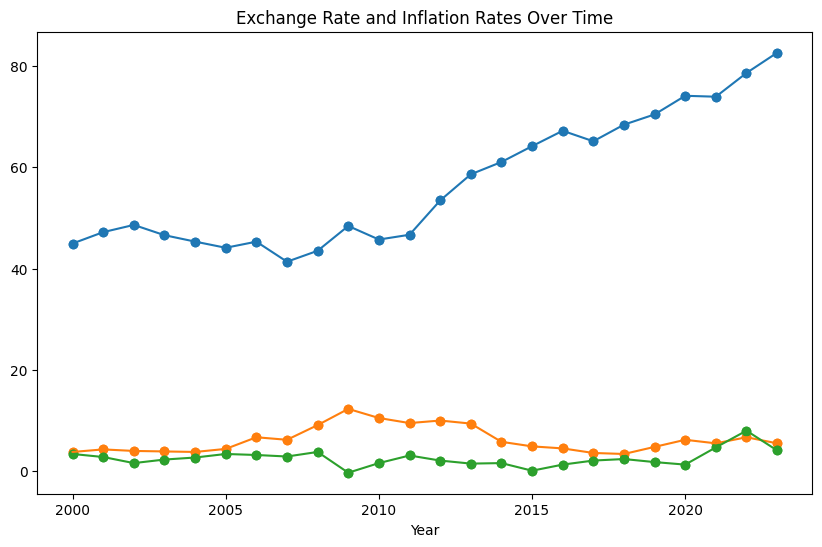

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df_new['Year'],df_new['Exchange_Rate'],label='Exchange Rate')
plt.scatter(df_new['Year'],df_new['Exchange_Rate'])
plt.plot(df_new['Year'],df_new['India'],label='India')
plt.scatter(df_new['Year'],df_new['India'])
plt.plot(df_new['Year'],df_new['United States'],label='United States')
plt.scatter(df_new['Year'],df_new['United States'])
plt.title('Exchange Rate and Inflation Rates Over Time')
plt.xlabel('Year')

Findings from the comparative analysis:

Early 2000s: A period of high inflation in India coincides with a period of relative stability in the exchange rate. It suggests that factors other than inflation may have been driving the exchange rate during this time.

Late 2000s to Early 2010s: The period shows some alignment between rising inflation in India and a weakening INR, which indicates that inflation could be contributing to exchange rate movements.

2015 Onwards: The exchange rate continues to rise, while both India’s and the United States’ inflation rates remain relatively low. This divergence suggests that the exchange rate is influenced by additional factors beyond inflation, such as economic growth, monetary policy, and international trade dynamics.

Analyzing Inflation based on the Purchasing Power Parity (PPP)

Purchasing Power Parity (PPP) is an economic theory that suggests that in the long term, exchange rates between two countries should adjust so that a basket of goods costs the same in both countries when priced in a common currency. PPP is used as a method to compare the economic productivity and standards of living between different countries. If one country’s inflation rate is higher than another’s, its currency should depreciate accordingly to maintain parity in purchasing power to ensure that the same goods cost the same in both locations.

In [20]:
initial=df_new['Exchange_Rate'].iloc[0]
initial
df_new['Expected_Rate']=initial*((1+df_new['India']/100)/(1+df_new['United States']/100)).cumprod()
df_new

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26036\194661910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Expected_Rate']=initial*((1+df_new['India']/100)/(1+df_new['United States']/100)).cumprod()


,Year,India,United States,Exchange_Rate,Expected_Rate
40,2000,3.8,3.4,44.941605,45.115460
41,2000,3.8,3.4,44.941605,45.289988
42,2001,4.3,2.8,47.186414,45.950834
43,2001,4.3,2.8,47.186414,46.621323
44,2002,4.0,1.6,48.610319,47.722614
45,2002,4.0,1.6,48.610319,48.849920
46,2003,3.9,2.3,46.583284,49.613946
47,2003,3.9,2.3,46.583284,50.389922
48,2004,3.8,2.7,45.316467,50.929639
49,2004,3.8,2.7,45.316467,51.475136


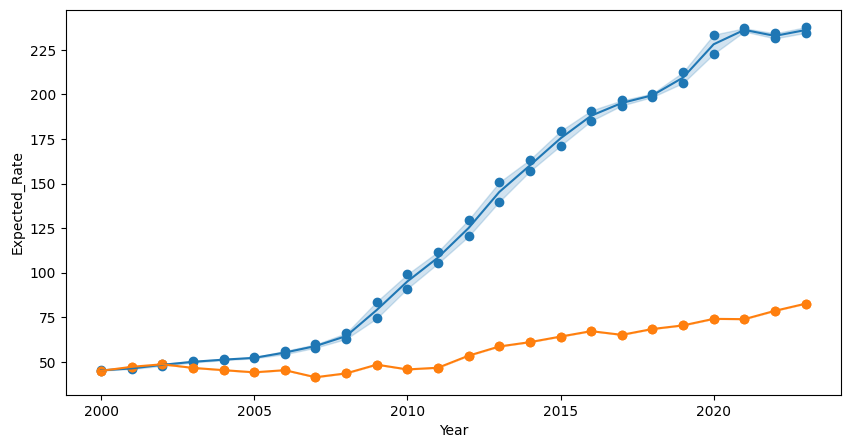

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='Expected_Rate',data=df_new)
sns.lineplot(x='Year',y='Exchange_Rate', data=df_new)
plt.scatter(df_new['Year'], df_new['Expected_Rate'])
plt.scatter(df_new['Year'], df_new['Exchange_Rate'])


The orange line represents the actual exchange rate (INR/USD) over time, while the blue dashed line represents the expected exchange rate based on PPP. In some periods, the actual exchange rate closely follows the expected PPP-based rate, which suggests that PPP holds. However, in other periods, there are significant deviations between the two.

The PPP-based expected exchange rate shows a more rapid increase compared to the actual exchange rate. It suggests that, according to PPP, the INR should have depreciated more than it actually did. However, the actual exchange rate was consistently lower than the PPP-based expected rate, which indicates that factors other than inflation are at play.

Conclusion

Our analysis revealed that inflation in India and the United States influences the exchange rate between INR and USD. Higher inflation in India generally leads to a depreciation of the INR relative to the USD, while lower inflation in the United States contributes to a stronger USD. While inflation affects the exchange rate between INR and USD, it is only one of many factors.